### HW03: Practice with SVM, kNN, gradient descent, feature engineering

In [1]:
import pandas as pd
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier

# ... your code here ... (import statements)

## 1. Visualize classifier decision boundaries.

## 1a. Complete the function in the next cell that plots a classifier's decision boundary.

In [2]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    x_vals = np.linspace(xlim[0], xlim[1], grid_resolution)
    y_vals = np.linspace(ylim[0], ylim[1], grid_resolution)

    xx = np.tile(x_vals, grid_resolution)
    yy = np.repeat(y_vals, grid_resolution)

    grid_points = np.stack([xx, yy], axis=1)

    df = pd.DataFrame(grid_points, columns=['x0', 'x1'])

    colors_dict = {-1: 'pink', 1: 'lightskyblue'}


    predicted_labels = clf.predict(df)


    for label, color in colors_dict.items():
        mask = predicted_labels == label
        plt.plot(grid_points[mask, 0], grid_points[mask, 1], 'o', color=color)

### Visualize the decision boundary for an SVM.


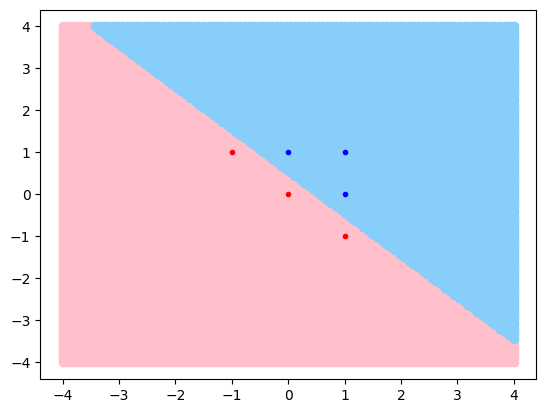

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])


plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)

colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1b. Visualize the decision boundary for a decision tree.

|--- feature_1 <= -0.50
|   |--- class: -1
|--- feature_1 >  -0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- feature_0 >  -0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 1



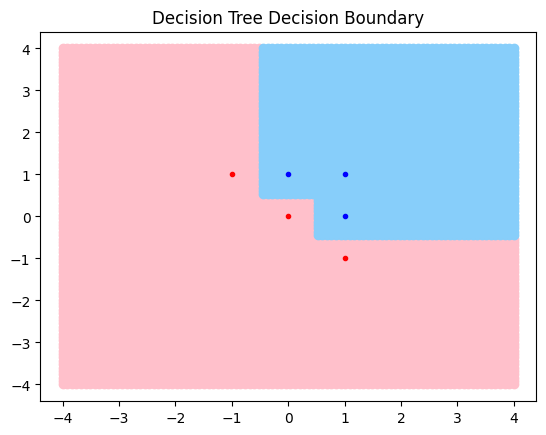

In [4]:
# ... your code here ...

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf_tree.fit(df[['x0', 'x1']], df['y'])

print(export_text(clf_tree))

plot_decision_boundary(clf=clf_tree, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)

for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])
plt.title("Decision Tree Decision Boundary")
plt.show()

### 1c. Visualize the decision boundary for kNN with $k=3$.

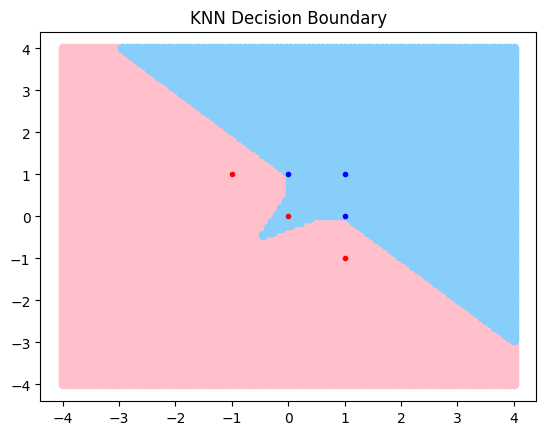

In [5]:
# ... your code here ...
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=knn, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)

for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])
plt.title("KNN Decision Boundary")
plt.show()

### 1d. Visualize the decision boundary for an SVM with a nonlinear boundary.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


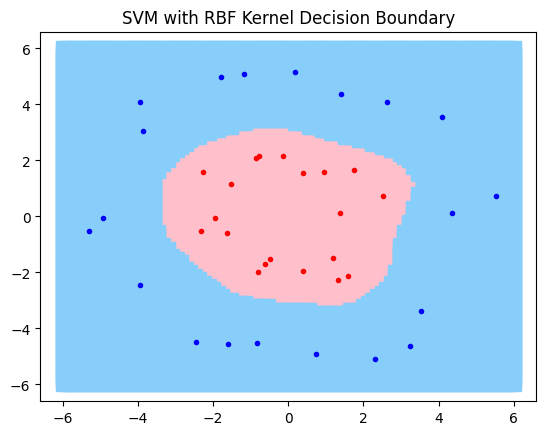

In [6]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    x_vals = np.linspace(xlim[0], xlim[1], grid_resolution)
    y_vals = np.linspace(ylim[0], ylim[1], grid_resolution)

    xx = np.tile(x_vals, grid_resolution)
    yy = np.repeat(y_vals, grid_resolution)

    grid_points = np.stack([xx, yy], axis=1)

    df = pd.DataFrame(grid_points, columns=['x0', 'x1'])

    colors_dict = {-1: 'pink', 1: 'lightskyblue'}
    predicted_labels = clf.predict(df)

    for label, color in colors_dict.items():
        points = grid_points[predicted_labels == label]
        plt.plot(points[:, 0], points[:, 1], 's', color=color, markersize=10)
        

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Read the data
data_url = "circles.csv"
df = pd.read_csv(data_url)

# Convert 0 values in 'y' to -1
df['y'] = df['y'].replace({0: -1})

# Separate features and target variable
X = df[['x0', 'x1']].values
y = df['y']

# Train the SVM with RBF kernel and gamma = 0.5
clf = SVC(kernel='rbf', C=1, gamma=0.5)
clf.fit(X, y)

plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)

colors = {-1:'red', 1:'blue'}
for y_val in (-1, 1):
    plt.plot(df.x0[df.y == y_val], df.x1[df.y == y_val], '.', color=colors[y_val])

plt.title("SVM with RBF Kernel Decision Boundary")
plt.show()


## 2. Run gradient descent by hand.
Run gradient descent with $\alpha = 0.1$ to minimize $z = f(x, y)
= (x + 1)^2 + (y + 2)^2$. Start at (0, 0) and find the next two points
on the descent path.

Hint: The minimum is at (-1, -2), so your answer should be approaching this point.

Given:
Given the function:
$$ f(x, y) = (x + 1)^2 + (y + 2)^2 $$

The gradient of \( f \) is:
$$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2(x + 1), 2(y + 2) \right) $$


$$ (x_0, y_0) = (0, 0) $$

After the first iteration:
$$ x_1 = x_0 - 0.1 \times 2 = -0.2 $$
$$ y_1 = y_0 - 0.1 \times 4 = -0.4 $$

$$ (x_1, y_1) = (-0.2, -0.4) $$

After the second iteration:
$$ x_2 = x_1 - 0.1 \times 1.6 = -0.36 $$
$$ y_2 = y_1 - 0.1 \times 3.2 = -0.72 $$

New Point:
$$ (x_2, y_2) = (-0.36, -0.72) $$



## 3. Practice feature engineering
by exploring the fact that rescaling may be necessary for kNN but not for a decision tree.

### 3a. Read and plot a toy concentric ellipses data set.

      x0     x1  y
0 -1.937 -0.006  0
1 -1.622 -0.057  0
2 -0.791 -0.200  0
3 -0.614 -0.171  0
4 -0.490 -0.154  0


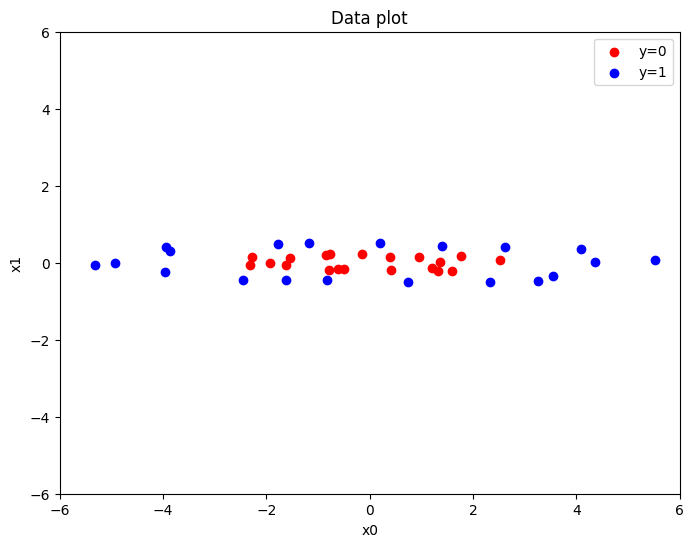

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ellipses.csv")

print(df.head())

plt.figure(figsize=(8, 6))

plt.scatter(df[df['y'] == 0]['x0'], df[df['y'] == 0]['x1'], color='red', label='y=0')
plt.scatter(df[df['y'] == 1]['x0'], df[df['y'] == 1]['x1'], color='blue', label='y=1')


plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Data plot')
plt.legend()



### 3b. Train a $k$NN classifier and report its accuracy.
- Use $k = 3$ and the (default) euclidean metric.
- Report the accuracy on the training data by writing a line like `Training accuracy is 0.500`
  (0.500 may not be correct).

In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("ellipses.csv")

X = df[['x0', 'x1']]
y = df['y']

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

y_pred = knn.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Training accuracy is {accuracy}")


Training accuracy is 0.725


### 3c. Now rescale the features using standardization; plot, train, and report accuracy again.
- Fit the scaler to the training features.
- Transform the training features.
- Plot the rescaled data.
- Train kNN again and report its accuracy as before. (Notice that rescaling helped.)

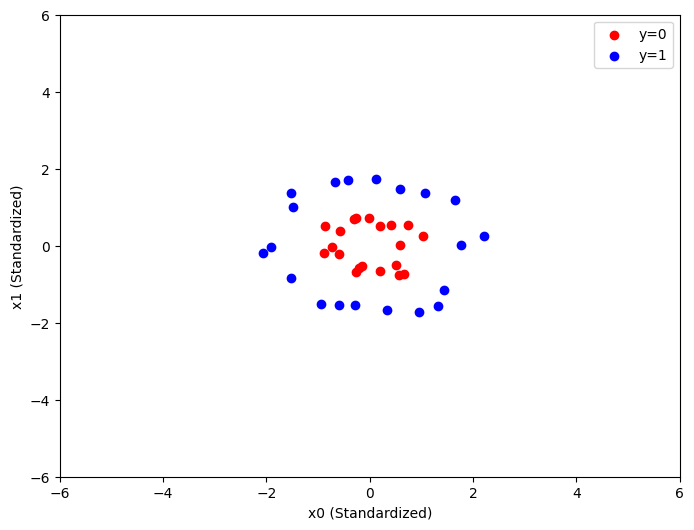

Training accuracy with standardized features is 1.0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv("ellipses.csv")

X = df[['x0', 'x1']]
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], color='red', label='y=0')
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='blue', label='y=1')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('x0 (Standardized)')
plt.ylabel('x1 (Standardized)')
plt.legend()
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

accuracy = accuracy_score(y, y_pred)
print(f"Training accuracy with standardized features is {accuracy}")


### 3d. Train a decision tree classifier on the original (unscaled) data and report its accuracy.
- Train on the training data.
- Report the accuracy as before.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("ellipses.csv")

X = df[['x0', 'x1']]
y = df['y']

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)
y_pred_tree = tree_clf.predict(X)

accuracy_tree = accuracy_score(y, y_pred_tree)
print(f"Training accuracy with Decision Tree on original data is {accuracy_tree}")


Training accuracy with Decision Tree on original data is 1.0


### 3e. Why is feature scaling unnecessary for an ID3 decision tree? Answer in a markdown cell.


In feature scaling we are performing a monotonic transformation... for example, if we multiply all values of a feature by 10 or take the log of all values, the order remains the same. When an ID3 decision tree decides on a split, it's based on the order of the values and not their absolute magnitudes. Therefore, feature scaling is not necessary for an ID3 decision tree. Whether a feature has values like [1, 2, 3] or [10, 20, 30] or [0.1, 0.2, 0.3], the relative ordering (and therefore the decision based on a threshold) remains the same. 